# M1 SID TP3 Algèbre linéaire  - Réduction de matrices
Matière: EMMAK1D1 - Algèbre Linéaire  
Auteur : Nicolas Enjalbert Courrech & Ludovic Tuncay

**NOM** : ISHIMWE

**Prénom** : KIM 

**Email** : kim.ishimwe@univ-tlse3.fr


---

Ce TP vise à explorer les réductions de matrices avec python. Dans la première partie de ce TP toute les matrices sont carrées.

# I - Le cas des matrices carrés

## I.A- Généralité 

Quel est le principe de la réductions de matrice ? 

In [ ]:
# Le principe de réduction d'une matrice consiste à créer une version matricielle de la réduction d'endomorphisme en dimension finie

Quelle est l'utilisation de la réduction de matrice dans l'analyse des données ? 

In [ ]:
# L'utilisation de la réduction de matrice dans l'analyse de données se retrouve surtout dans l'ACP en statistiques qui est une méthode qui permet
# d'analyser de manière exploratoire les données en réduisant leur dimension.

## 1.B - Implémentation de la diagonalisation 

In [1]:
!pip3 install numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 33.4 MB/s eta 0:00:00m eta 0:00:010:00:01


In [5]:

import numpy as np
from numpy import *

In [3]:
A = np.array([[2,4,3],[0,1,1],[2,2,-1]])
x,y = np.linalg.eig(A)  # me donne la matrice des valeurs propres et la matrice des vecteurs propres
x # valeurs propres
y  # vecteurs propres
D = np.diag(x)
D_inv = np.linalg.inv(y) #inversion de la matrice des vecteurs propres

#verif
B = y @ D @ D_inv
B
D


array([[ 4.        ,  0.        ,  0.        ],
       [ 0.        , -2.41421356,  0.        ],
       [ 0.        ,  0.        ,  0.41421356]])

Comment est implémenté cette fonction ? Est ce que cela donne l'ensemble des sorties nécessaires pour avoir $A = PDP^-1$ ?

In [4]:
'''
on peut implémenter cette fonction en lui mettant en paramètre une matrice
On calcule les valeurs et les vecteurs propres de la matrice en paramètre
On construit les matrices D et P ( et P-1 en passant)
Et enfin, on retourne le produit PDP-1

Cette fonction marche uniquement avec des matrices diagonalisables.
Une matrice non carrée par exemple ne peut pas être prise en paramètre de la fonction

'''

Quelle est la compléxité en temps de ces fonctions pour une résolution complète ? (reprendre les méthodes de simulation vues dans le TP1)

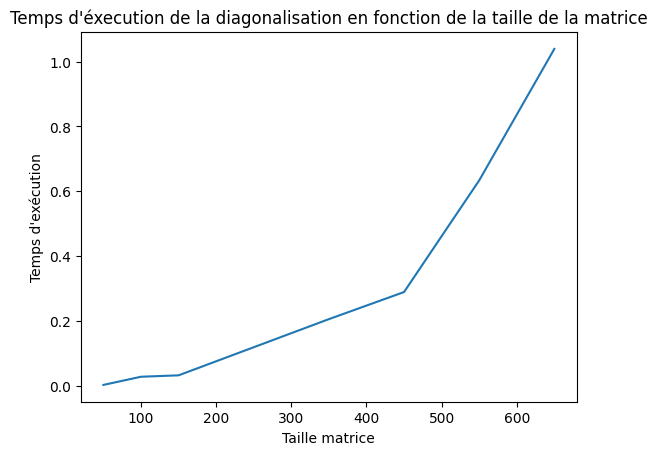

In [52]:
def diagonalisation(mat):
    x,y  = np.linalg.eig(mat)
    D = np.diag(x)
    D_inv = np.linalg.inv(y)
    return (y,D, D_inv)
import time
def temps_diag():
    tailles = [50, 100, 150, 350, 450, 550, 650]
    temps = []

    for elt in tailles:
        A = np.random.rand(elt, elt)

        debut = time.time()
        diagonalisation(A)
        fin = time.time()

        temps.append(fin-debut)

    plt.plot(tailles, temps)
    plt.xlabel('Taille matrice')
    plt.ylabel("Temps d'exécution")
    plt.title("Temps d'éxecution de la diagonalisation en fonction de la taille de la matrice")
    plt.show()

temps_diag()

Calculer le facteur de [Cholesky](https://fr.wikipedia.org/wiki/Factorisation_de_Cholesky) de la matrice associée à la forme quadratique ci dessous 
$$ q(x,y,z) = 2x^2+2y^2 + 2z^2 + 2xy + 2xz+ 2yz$$

La fonction `np.linalg.cholesky` vous aidera. 

In [ ]:
import numpy as np 
np.linalg.cholesky(np.array(...))

In [7]:
# la matrice associée à cette forme quadratique est:
A = np.array([[2,1,1],[1,2,1],[1,1,2]])


In [11]:
# facteur de cholesky
C = np.linalg.cholesky(A)
C

array([[1.41421356, 0.        , 0.        ],
       [0.70710678, 1.22474487, 0.        ],
       [0.70710678, 0.40824829, 1.15470054]])

In [10]:
# verif
Ct = np.transpose(C)
A = C @ Ct
A

array([[2., 1., 1.],
       [1., 2., 1.],
       [1., 1., 2.]])

## 1.C - Comparaison temps d'exécution de la puissance d'une matrice

Grâce à la diagonalisation des matrices nous pouvons facilement calculer la puissance d'une matrice. 

Implémenter cette méthode. 

In [ ]:
'''pour calculer la puissance d'une matrice 
il suffit de diagonaliser la matrice et d'élever la matrice des valeurs propres à la puissance voulue
'''

In [ ]:
 # cette méthode va prendre en paramètre la matrice et la puissance 

In [9]:
def puissance(A,n):
    x,y  = np.linalg.eig(A)
    D = np.diag(x)
    D_inv = np.linalg.inv(y)
    return y @ (np.linalg.matrix_power(D,n)) @ D_inv


In [4]:
# verif 
B = np.array([[2,4,3],[0,1,1],[2,2,-1]])
print(puissance(B,6))
print(np.linalg.matrix_power(B,6)) # avec la fonction numpy




[[2346. 4634. 2247.]
 [ 378.  715.  308.]
 [ 994. 2128. 1233.]]
[[2346 4634 2247]
 [ 378  715  308]
 [ 994 2128 1233]]


In [10]:
def methode_diag(n, power):
  val = np.random.rand(n,n) #matrice

  start = time.time()
  puissance(val,power)
  end = time.time()

  return end - start





In [2]:
def methode_numpy(n, power):
  val = np.random.rand(n,n)

  start = time.time()
  np.linalg.matrix_power(val,power)
  end = time.time()

  return end - start


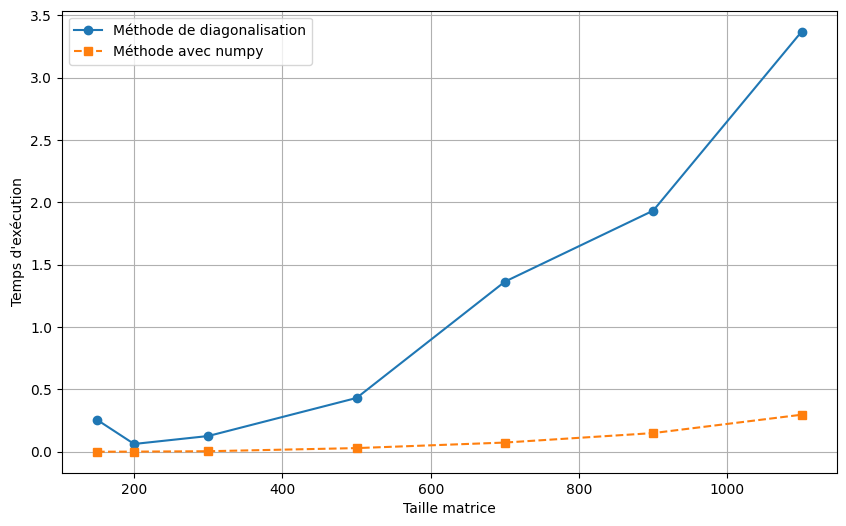

In [14]:
tailles = [150,200,300,500,700,900,1100]

execution_diag = []
execution_numpy = []
for taille in tailles:
  # prenons une puissance fixe de 100 pour chaque matrice de la liste
  execution_diag.append(methode_diag(taille,100))
  execution_numpy.append(methode_numpy(taille, 100))
  

plt.figure(figsize=(10,6))
plt.plot(tailles,execution_diag, label = 'Méthode de diagonalisation', marker = 'o')
plt.plot(tailles, execution_numpy, label = 'Méthode avec numpy', marker = 's', linestyle = '--')
plt.xlabel('Taille matrice')
plt.ylabel("Temps d'exécution")
plt.legend()
plt.grid()
plt.show()

In [ ]:
''' 
Il existe une fonction numpy (matrix_power) qui permet de calculer la puissance d'une matrice
Cette fonction et celle qui utilise la diagonalisation n'ont pas les mêmes temps d'éxecution
La fonction numpy semble être la plus performante
'''

Est ce qu'il y a une fonction numpy pour le calculer ? Est ce que les deux résultats sont les mêmes ? Comparer les temps de calcul des deux fonctions. 

Comparer le temps de calcul avec la fonction :
``` 
B = A
for i in range(1,n):
    B = np.dot(A,B)
```

**Faire un beau graphique** :) 
    
Est ce que faire le calcul avec la diagonalisation est meilleure ? Non, la méthode numpy reste meilleure par rapport aux deux autres.

In [18]:
def third_function(A,n):
    B = A
    for i in range(1,n):
        B = np.dot(A,B)
    return B

def methode_dot(n, power):
    val = np.random.rand(n,n)
    start = time.time()
    third_function(val, power)
    end = time.time()
    return end - start






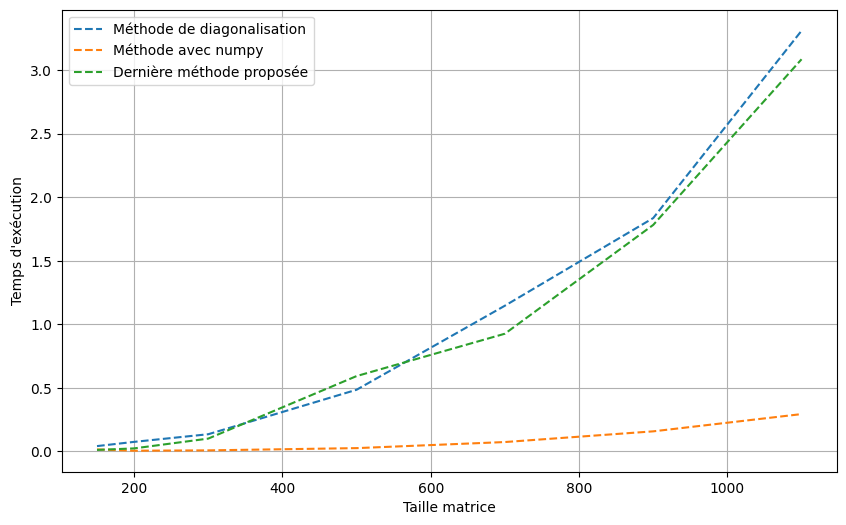

In [20]:
tailles = [150,200,300,500,700,900,1100]

execution_diag = []
execution_numpy = []
execution_dot = []
for taille in tailles:
  # prenons une puissance fixe de 100 pour chaque matrice de la liste
  execution_diag.append(methode_diag(taille,100))
  execution_numpy.append(methode_numpy(taille, 100))
  execution_dot.append(methode_dot(taille,100))
  

plt.figure(figsize=(10,6))
plt.plot(tailles,execution_diag, label = 'Méthode de diagonalisation', linestyle = '--')
plt.plot(tailles, execution_numpy, label = 'Méthode avec numpy', linestyle = '--')
plt.plot(tailles, execution_dot, label = 'Dernière méthode proposée', linestyle = '--')
plt.xlabel('Taille matrice')
plt.ylabel("Temps d'exécution")
plt.legend()
plt.grid()
plt.show()

# Analyse en composante principale

Quel est le principe de l'ACP ? 

In [ ]:
'''
L'ACP consiste à réduire la dimensionnalité des données tout en conservant au maximum la variance des données initiales

Implémenter l'ACP à partir des fonctions numpy. 

In [35]:
def acp(A, n): # n = nombre de composants
 

    A_centre = A - np.mean(A, axis=0) # centrage des données
    mat_cov = np.cov(A_centre, rowvar = False) # matrice des covariances
    val_prop, vect_prop = np.linalg.eigh(mat_cov) # valeurs et vecteurs propres
    # tri des valeurs et vecteurs propres
    indices = np.argsort(val_prop)[:: -1]
    val_trie = val_prop[indices]
    vec_trie = vect_prop[:, indices]

    # nombre de composantes
    composantes = vec_trie[:, :n]
    variance_exp = val_trie[:n]

    A_acp = np.dot(A_centre, composantes)

    return A_acp, composantes, variance_exp


Utiliser le jeu de données Iris pour tester votre implémentation. 

In [24]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 34.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 24.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 24.2 MB/s eta 0:00:00


In [6]:
import sklearn, time


In [26]:
from sklearn import datasets
irisData = datasets.load_iris()
irisData.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Diagonaliser la matrice $ \begin{pmatrix} 2 & 4 & 3 \\ 0 & 1 & 1 \\ 2 & 2 & -1 \end{pmatrix} $ grâce à la fonction [`eig`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) du package numpy

In [40]:
iris_acp, dims, variance = acp(irisData.data, 3) # on prend les 3 premières composantes principales
iris_acp

array([[ 2.68412563,  0.31939725,  0.02791483],
       [ 2.71414169, -0.17700123,  0.21046427],
       [ 2.88899057, -0.14494943, -0.01790026],
       [ 2.74534286, -0.31829898, -0.03155937],
       [ 2.72871654,  0.32675451, -0.09007924],
       [ 2.28085963,  0.74133045, -0.16867766],
       [ 2.82053775, -0.08946138, -0.25789216],
       [ 2.62614497,  0.16338496,  0.02187932],
       [ 2.88638273, -0.57831175, -0.02075957],
       [ 2.6727558 , -0.11377425,  0.19763272],
       [ 2.50694709,  0.6450689 ,  0.07531801],
       [ 2.61275523,  0.01472994, -0.10215026],
       [ 2.78610927, -0.235112  ,  0.20684443],
       [ 3.22380374, -0.51139459, -0.06129967],
       [ 2.64475039,  1.17876464,  0.15162752],
       [ 2.38603903,  1.33806233, -0.2777769 ],
       [ 2.62352788,  0.81067951, -0.13818323],
       [ 2.64829671,  0.31184914, -0.02666832],
       [ 2.19982032,  0.87283904,  0.12030552],
       [ 2.5879864 ,  0.51356031, -0.21366517],
       [ 2.31025622,  0.39134594,  0.239

# II - La méthode de Décomposition en Valeurs Singulières (SVD)

In [42]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 28.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 16.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 13.0 MB/s eta 0:00:00


In [6]:
import numpy as np 
import matplotlib.pyplot as plt

## II.A - Généralité 

Quel est le principe de la Décomposition en Valeurs Singulières ? 

In [ ]:
'''
La Décompositions en Valeurs Singulières consiste à factoriser une matrice A m*n en un produit de 3 matrices:
A = U.D.v
U est une matrice de taille de m*m
D est une matrice diagonale avec les valeurs singulières sur la diagonale ordonnées de manière décroissante
V une matrice de taille n*n 
'''

Quelles sont les conditions pour utiliser cette méthode ? 

In [ ]:
'''
Il faut que la matrice à décomposer ne soit pas nulle
Il faut éviter une linéarité entre les colonnes de la matrice

'''

Quelle(s) est(sont) le(s) utilisation(s) de la SVD dans l'analyse des données ? 

In [ ]:
'''
Réduction de la dimensionnalité des données
Traitement d'image
'''

## II.B - La SVD en python

Les packages `numpy` et `scipy` propose la fonction [`linalg.svd`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html). 

Faite la décomposition en valeur singulière pour la matrice 
$$A = \begin{pmatrix} 1 & 1 \\ 2 & 1 \\ -1 & 1\end{pmatrix}$$

In [46]:
A = np.array([[1,1],[2,1],[-1,1]])

In [47]:
np.linalg.svd(A)

SVDResult(U=array([[-5.07092553e-01,  3.16227766e-01, -8.01783726e-01],
       [-8.45154255e-01, -7.62082630e-17,  5.34522484e-01],
       [ 1.69030851e-01,  9.48683298e-01,  2.67261242e-01]]), S=array([2.64575131, 1.41421356]), Vh=array([[-0.89442719, -0.4472136 ],
       [-0.4472136 ,  0.89442719]]))

Créer une fonction qui permet de retrouver la matrice pseudo-diagonale $\Sigma$ à partir d'une liste de valeurs singulières.

In [48]:
def pseudo_diag(list_val):
    matrice = np.array(list_val)
    return np.diag(matrice)


Evaluer la complexité en temps en fonction de la taille de la matrice. 

Taille: 150, Temps d'exécution: 0.00023102760314941406 secondes
Taille: 200, Temps d'exécution: 0.00028824806213378906 secondes
Taille: 300, Temps d'exécution: 0.0012252330780029297 secondes
Taille: 500, Temps d'exécution: 0.0004494190216064453 secondes
Taille: 3000, Temps d'exécution: 0.02853870391845703 secondes
Taille: 7000, Temps d'exécution: 0.07141375541687012 secondes


Text(0, 0.5, "Temps d'exécution")

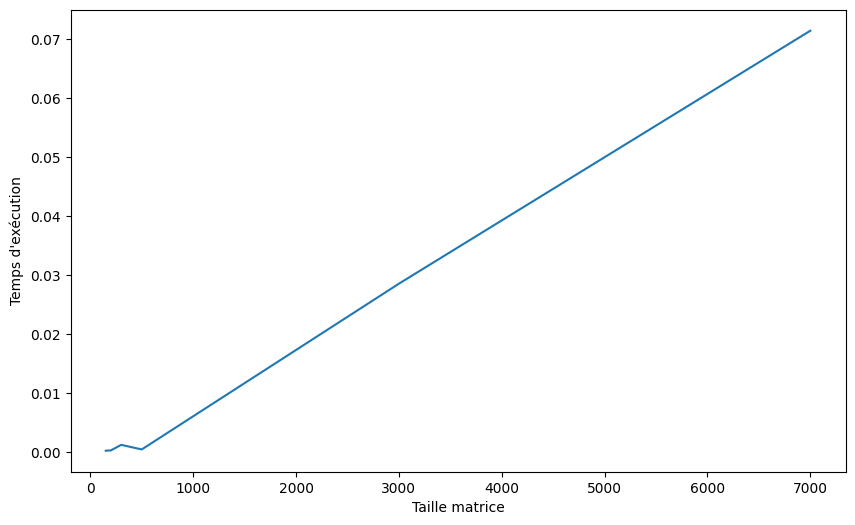

In [60]:
def temps(n):
  val = np.random.rand(n)

  start = time.time()
  pseudo_diag(val)
  end = time.time()

  return end - start

tailles = [150,200,300,500,3000,7000]

execution = []
for taille in tailles:
  temps_exec = temps(taille)
  execution.append(temps_exec)
  print(f"Taille: {taille}, Temps d'exécution: {temps_exec} secondes")

plt.figure(figsize=(10,6))
plt.plot(tailles,execution)
plt.xlabel('Taille matrice')
plt.ylabel("Temps d'exécution")



Créer une fonction qui permet de retrouver A à partir de sa décomposition en valeurs singulières. 

In [66]:
def reconst(U,D,V):
    sigma = np.zeros((U.shape[0], V.shape[0])) # créer une matrice nulle
    np.fill_diagonal(sigma, D) # remplire la matrice nulle par les val singulières contenu dans D
    return U @ sigma @ V
    

In [68]:
# test
A = np.array([[1,1],[2,1],[-1,1]])

u,d,v = np.linalg.svd(A)

A_reconst = reconst(u,d,v)
# verif
print(A)
print(A_reconst)



[[ 1  1]
 [ 2  1]
 [-1  1]]
[[ 1.  1.]
 [ 2.  1.]
 [-1.  1.]]


# Compression d'image avec svd 


http://perso.numericable.fr/jules.svartz/prepa/IPT_spe/TP_images_spe.pdf

Une des applications de la svd est la compréssion d'information. Pour la science des données, son application principale va être dans l'analyse de données. Néanmoins, cette méthode peut aussi être utilisée comme moyen simple de compresser une image. 

Prenons une image en noir et blanc de dimensions $m \times n$

Cette compression peut se faire en ne gardant que les $k$ valeurs singulières les plus significatives. Soit mettre les valeurs singulières $s_{k,k}$ ... $s_{r,r}$ avec $r = min(m,n)$ à zéros. Nous pouvons aussi ne garder que les k premières colonnes de U et les k première ligne de $^tV$.

(236, 214)


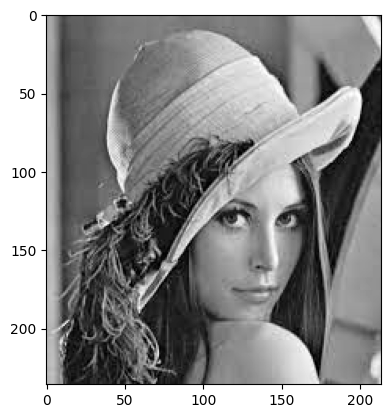

In [12]:
#utiliser l'image suivante : 

import matplotlib.pyplot as plt 
import numpy as np

lena = np.genfromtxt('lenaG.csv')

# # Si les données sont dans un fichier image 
# lena = plt.imread("lena.jpeg")
# # Pour enlever la couleur on peut utiliser la fonction suivante
# def colorToGrey(img):
#     return np.array([[i.mean() for i in ligne]for ligne in img])
# lena = colorToGrey(lena)
# 

print(lena.shape)
plt.imshow(lena, "gray")


1) faire une fonction qui prend en compte une matrice $M$ et un scalaire $k$ et qui retourne la compression au sens de la svd.


In [31]:
def decompression(M, k):
    M = rgb2gray(M)
    U,S,V = np.linalg.svd(M, full_matrices = False)

    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vk = V[:k, :]
    M_decompresse = np.dot(Uk,np.dot(Sk, Vk))
    
    return M_decompresse

2) essayer cette fonction sur l'image de Lena en faisant varier $k = \{10, 20, 30, 40, ... 150\}$

In [21]:
image = plt.imread('/home/sid2018-3/Téléchargements/algèbre linéaire/lena.jpeg') 
image

array([[[162, 162, 162],
        [165, 165, 165],
        [168, 168, 168],
        ...,
        [108, 108, 108],
        [ 89,  89,  89],
        [108, 108, 108]],

       [[162, 162, 162],
        [165, 165, 165],
        [168, 168, 168],
        ...,
        [134, 134, 134],
        [ 97,  97,  97],
        [ 95,  95,  95]],

       [[162, 162, 162],
        [165, 165, 165],
        [168, 168, 168],
        ...,
        [171, 171, 171],
        [117, 117, 117],
        [ 87,  87,  87]],

       ...,

       [[182, 182, 182],
        [182, 182, 182],
        [184, 184, 184],
        ...,
        [169, 169, 169],
        [202, 202, 202],
        [223, 223, 223]],

       [[182, 182, 182],
        [182, 182, 182],
        [184, 184, 184],
        ...,
        [164, 164, 164],
        [200, 200, 200],
        [223, 223, 223]],

       [[182, 182, 182],
        [182, 182, 182],
        [184, 184, 184],
        ...,
        [171, 171, 171],
        [208, 208, 208],
        [233, 233, 233]]

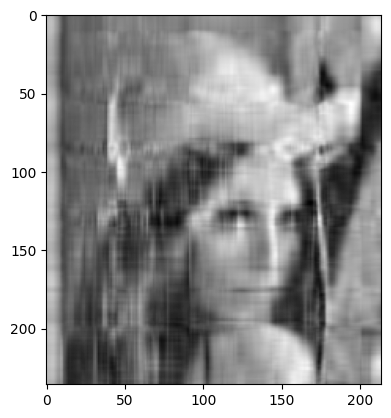

In [34]:
#k = 10

image_compresse = decompression(image, 10)
plt.imshow(image_compresse, cmap= 'gray')

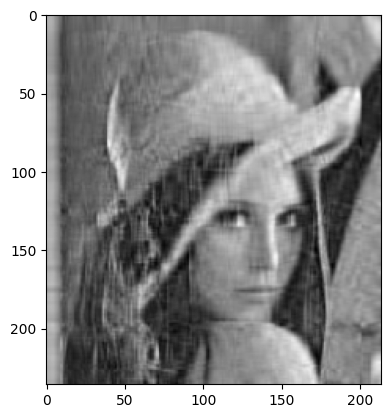

In [35]:
#k = 20

image_compresse = decompression(image, 20)
plt.imshow(image_compresse, cmap= 'gray')

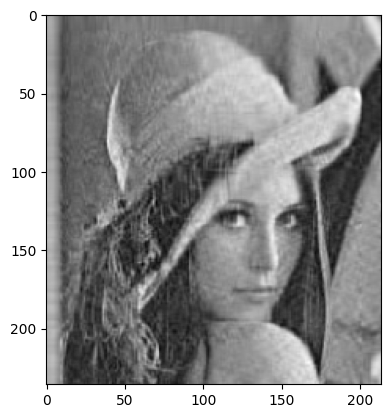

In [37]:
#k = 30

image_compresse = decompression(image, 30)
plt.imshow(image_compresse, cmap= 'gray')

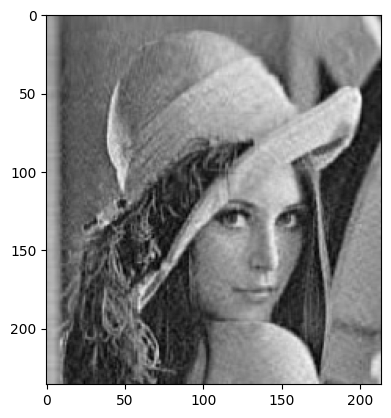

In [38]:
#k = 40

image_compresse = decompression(image, 40)
plt.imshow(image_compresse, cmap= 'gray')

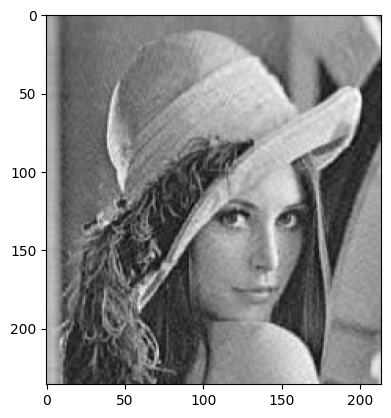

In [39]:
#k = 50

image_compresse = decompression(image, 50)
plt.imshow(image_compresse, cmap= 'gray')

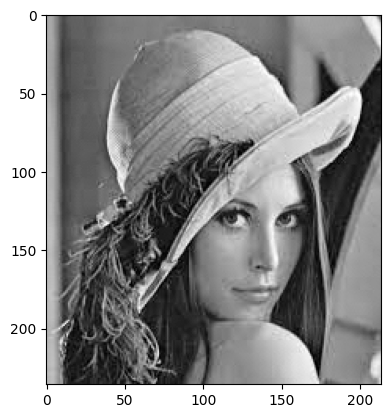

In [40]:
#k = 150

image_compresse = decompression(image, 150)
plt.imshow(image_compresse, cmap= 'gray')

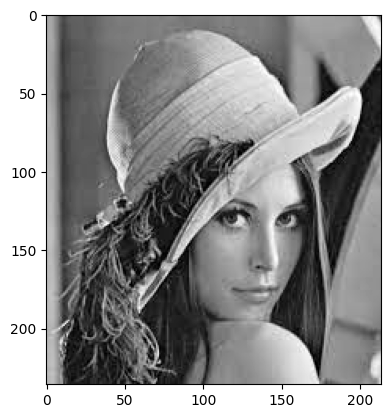

In [41]:
#k = 200

image_compresse = decompression(image, 200)
plt.imshow(image_compresse, cmap= 'gray')

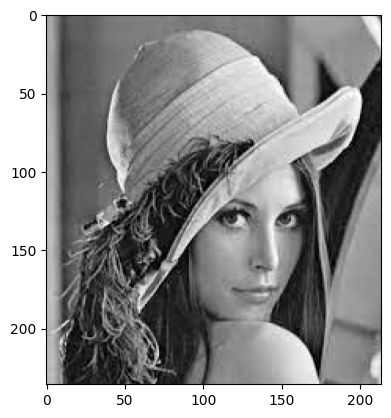

In [42]:
#k = 1000

image_compresse = decompression(image, 1000)
plt.imshow(image_compresse, cmap= 'gray')

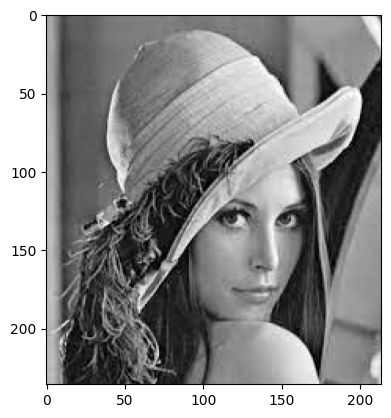

In [43]:
#k = 10

image_compresse = decompression(image, 1000)
plt.imshow(image_compresse, cmap= 'gray')

Quelles sont vos observations et conclusions ? 

In [ ]:
# Plus on retient un nombre important de valeurs singulières de la matrice ,associée à l'image, plus l'image compressée devient nette.

# Question bonus ***s'il vous reste du temps en TP*** 

Implémenter soit même un ensemble de fonction pour diagonaliser une matrice. 

In [1]:
# on peut implémenter cette fonction en lui mettant en paramètre une matrice
def diagona(mat):
    x,y  = np.linalg.eig(mat)
    D = np.diag(x)
    D_inv = np.linalg.inv(y)
    return (y,D, D_inv)
# on a également la fonction diag de numpy.linalg

Implémenter soit même la méthode de SVD sans utiliser la fonction svd des librairies

In [13]:
def svd_algo(A):
    tAA = np.dot(np.transpose(A), A)
    AtA = np.dot(A, np.transpose(A))

    val_pr_u, U = np.linalg.eigh(AtA)
    val_pr_v, V = np.linalg.eigh(tAA)

    indices_u = np.argsort(val_pr_u)[:: -1]
    indices_v = np.argsort(val_pr_v)[:: -1]


    U = U[:, indices_u]
    V = V[:, indices_v]
    val_pr_u = val_pr_u[indices_u]
    
    S = np.sqrt(val_pr_u)
    S_mat = np.zeros_like(A, dtype=float)
    np.fill_diagonal(S_mat, S)

    return U, S_mat, np.transpose(V)


In [14]:
# verif
C =  np.array([[1,1],[2,1],[-1,1]])
svd_algo(C)


(array([[-5.07092553e-01, -3.16227766e-01,  8.01783726e-01],
        [-8.45154255e-01,  6.93889390e-18, -5.34522484e-01],
        [ 1.69030851e-01, -9.48683298e-01, -2.67261242e-01]]),
 array([[2.64575131, 0.        ],
        [0.        , 1.41421356],
        [0.        , 0.        ]]),
 array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))